# Universidad Central de Venezuela
## Facultad de Ciencias
### Escuela de Computación
#### Aprendizaje Automático

**Joiner Rojas V29501730**

## Tarea #2 

# 1-A MNIST-Modelo de clasificación de Números

En esta sección, se detallan los pasos para el preprocesamiento y transformación de los datos, así como la implementación de los modelos de Regresión Logística, k-Vecinos más Cercanos (k-NN) y Máquinas de Soporte Vectorial (SVM).

## Carga y Preprocesamiento de los Datos

El primer paso consiste en cargar y preprocesar el dataset MNIST. 

El dataset MNIST (Modified National Institute of Standards and Technology) es uno de los conjuntos de datos más utilizados en el campo del machine learning. Consiste en imágenes de dígitos manuscritos del 0 al 9, que han sido normalizadas a una resolución de 28x28 píxeles. Este dataset se utiliza comúnmente para entrenar y evaluar modelos de reconocimiento de patrones y aprendizaje automático, es precisamente lo que desarrolaremos a lo largo de este notebook

### Importación de librerias

En esta sección, importamos todas las librerías necesarias para trabajar con el dataset MNIST y realizar el preprocesamiento de datos. Las librerías son colecciones de código que nos proporcionan funciones y herramientas útiles. En este caso, utilizamos librerías para manejar datos, crear gráficos, y trabajar con modelos de machine learning.

In [20]:
# Importar la función para cargar MNIST desde Keras
from keras.datasets import mnist
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import joblib
from sklearn.svm import SVC

# Definir la cédula como semilla 
seed = 29501730
np.random.seed(seed)



### Carga del Dataset

Primero, necesitamos cargar el dataset MNIST, que contiene imágenes de dígitos manuscritos del 0 al 9. Este dataset es muy utilizado para entrenar y evaluar modelos de reconocimiento de patrones. Utilizaremos una función específica para cargar las imágenes y sus etiquetas correspondientes (los dígitos que representan).

In [2]:
# Cargar el dataset MNIST
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

# Unir todas las imágenes y etiquetas
Images = np.concatenate((trainImages, testImages), axis=0)
Labels = np.concatenate((trainLabels, testLabels), axis=0)

# Mezclar las imágenes y etiquetas usando la semilla, esto con el objetivo de dividir el dataset de manera random utilizando la cédula como parámetro
indices = np.arange(Images.shape[0])
np.random.shuffle(indices)
Images = Images[indices]
Labels = Labels[indices]

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba), estos porcentajes de división
# son un criterio heredado de la asignatura Minería de Datos (fue el usado en regresión lineal)
trainImages, testImages, trainLabels, testLabels = train_test_split(
    Images, Labels, test_size=0.2, random_state=seed
)

### Preprocesamiento y exploración

El preprocesamiento de datos es un paso crucial antes de utilizar los datos para entrenar modelos de machine learning. Incluye varias tareas que nos ayudan a preparar los datos de manera adecuada.

Aqui realizaremos diferentes actividades tales como:

* Mezclar las imágenes y las etiquetas de manera aleatoria utilizando una semilla específica. La semilla es un valor que garantiza que el proceso de mezcla sea reproducible.
* División de los datos en Conjuntos de Entrenamiento y Prueba. Utilizaremos para entrenar los modelos (80% de los datos), y un conjunto de prueba (20% de los datos). 
* Redimensionamiento de las imágenes de 28x28 píxeles a un formato lineal (una sola fila) y normalizamos los valores de los píxeles  (poner los valores entre 0 y 1)
* Conversión de Etiquetas a Categorías (los números que representan los dígitos) que es más adecuado para los modelos de machine learning.
* Finalmente, mostraremos las dimensiones (o formas) de los datos después de todas las operaciones de preprocesamiento. En este caso la inspeccion sera visual. Esto nos permite verificar que las operaciones se han realizado correctamente y que los datos están listos para ser utilizados en los modelos.

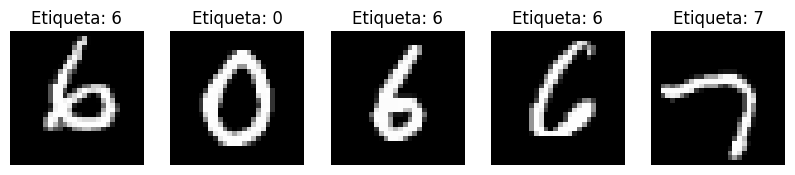

In [3]:
# Redimensionar y normalizar las imágenes
trainImages = trainImages.reshape((trainImages.shape[0], 28 * 28)).astype('float32') / 255
testImages = testImages.reshape((testImages.shape[0], 28 * 28)).astype('float32') / 255

# Convertir las etiquetas a categorías
trainLabels = to_categorical(trainLabels)
testLabels = to_categorical(testLabels)

# Convertir las etiquetas de vuelta a su formato original
trainLabels = np.argmax(trainLabels, axis=1)
testLabels = np.argmax(testLabels, axis=1)

# Mostrar algunas imágenes de entrenamiento
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(trainImages[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Etiqueta: {trainLabels[i]}")
    ax.axis('off')
plt.show()


Hemos completado el preprocesamiento del dataset MNIST, transformando nuestras imágenes y etiquetas para prepararlas adecuadamente para su uso en modelos de machine learning.

## Aplicación de Modelos 

En esta sección se implementan tres modelos de clasificación diferentes: Regresión Logística, k-Vecinos más Cercanos (k-NN), y Máquinas de Soporte Vectorial (SVM). Para cada modelo, se ajustan los hiperparámetros utilizando `GridSearchCV` y se evalúa el rendimiento.

#### ¿Qué es un Modelo de Machine Learning?

Un modelo de machine learning es una herramienta que aprende a partir de los datos para realizar predicciones o tomar decisiones sin necesidad de ser explícitamente programado para ello. Imagina que estás enseñando a un niño a reconocer diferentes tipos de frutas: le muestras varias imágenes de frutas (manzanas, naranjas, plátanos, etc.) y le dices qué fruta es cada una. Con el tiempo, el niño aprende a identificar las frutas por sí solo basándose en lo que ha aprendido. Un modelo de machine learning funciona de manera similar.

¿Qué Haremos con los Modelos?

* Entrenamiento del Modelo: En esta fase, le proporcionamos al modelo un conjunto de datos de entrenamiento. Estos datos incluyen ejemplos y sus correspondientes etiquetas (por ejemplo, imágenes de dígitos manuscritos y el número que representan).El modelo "aprende" de estos ejemplos ajustando sus parámetros internos para minimizar los errores en sus predicciones.

* Evaluación del Modelo:Después del entrenamiento, necesitamos evaluar el rendimiento del modelo para ver qué tan bien funciona.Usamos un conjunto de datos de prueba que el modelo no ha visto antes para evaluar su precisión y otras métricas de rendimiento.Esto nos ayuda a entender si el modelo puede generalizar bien a nuevos datos.

Vamos a implementar y comparar tres modelos de clasificación diferentes: Regresión Logística, k-Vecinos más Cercanos (k-NN) y Máquinas de Soporte Vectorial (SVM):

Evaluaremos cada modelo utilizando varias métricas, como la precisión, la exactitud y el puntaje F1. Estas métricas nos ayudarán a entender qué tan bien está funcionando cada modelo y a compararlos entre sí. Además, ajustaremos los hiperparámetros de cada modelo para mejorar su rendimiento. Los hiperparámetros son parámetros externos que se configuran antes del proceso de aprendizaje y afectan cómo el modelo aprende de los datos.

#### ¿Qué es un Hiperparámetro?

Un hiperparámetro es un parámetro cuyo valor se establece antes de que comience el proceso de aprendizaje del modelo.
A diferencia de los parámetros internos del modelo que se ajustan durante el entrenamiento (como los coeficientes en una regresión logística), los hiperparámetros deben definirse antes de entrenar el modelo.

* ¿Para qué sirven los Hiperparámetros?. Los hiperparámetros controlan el comportamiento del algoritmo de aprendizaje y pueden influir en el rendimiento del modelo. Ayudan a definir la estructura del modelo y el proceso de entrenamiento, asegurando que el modelo sea capaz de generalizar bien a nuevos datos.

* ¿Por qué se configuran los Hiperparámetros? Configurar los hiperparámetros de manera adecuada es crucial para optimizar el rendimiento del modelo.

La búsqueda de hiperparámetros permite encontrar la combinación óptima de valores que maximiza la precisión y la capacidad del modelo para predecir correctamente.


### Regresión Logística


La regresión logística es un modelo de clasificación que se utiliza para predecir una variable categórica. En nuestro caso, usaremos la regresión logística para predecir qué dígito está en una imagen del dataset MNIST.

#### Búsqueda de Hiperparámetros 

In [4]:
# Definir el modelo y los hiperparámetros a ajustar
param_grid_LR = {
    #'C': [0.01, 0.1, 1, 10, 100],
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],  
    'solver': ['lbfgs']
}

# Realizar la búsqueda de hiperparámetros con validación cruzada

#grid_search_LR = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_LR, cv=5, scoring='accuracy')
grid_search_LR= GridSearchCV(LogisticRegression(max_iter=500), param_grid_LR, cv=3, scoring='accuracy')
grid_search_LR.fit(trainImages, trainLabels)

# Resultados de la búsqueda de hiperparámetros
print("=" * 30)
print("Resultados obtenidos:")
print("=" * 30)
print(f"Hiperparámetros encontrados: {grid_search_LR.best_params_}")
print("\nMétricas del modelo:")
print(f"Precisión (Accuracy): {grid_search_LR.best_score_ * 100:.2f}%")
print("=" * 30)






Resultados obtenidos:
Hiperparámetros encontrados: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Métricas del modelo:
Precisión (Accuracy): 91.96%


Estos Hiperparametros significan lo siguiente:

C: 0.1:Controla la regularización del modelo, ayudando a prevenir el sobreajuste. Un valor menor implica una regularización más fuerte.

penalty: 'l2': Aplica una penalización basada en el cuadrado de los coeficientes del modelo para evitar el sobreajuste.

solver: 'lbfgs': Algoritmo de optimización eficiente para ajustar los parámetros del modelo.

#### Evaluación del modelo

Para evaluar los resultados obtenidos utilizaremos Metricas, descritas a continuacion:

* Precisión (Accuracy):Proporción de predicciones correctas sobre todas las predicciones.Ejemplo: Si se predicen correctamente 90 de 100 imágenes, la precisión es 90%.

* Exactitud (Precision):Proporción de verdaderos positivos sobre todas las predicciones positivas.Ejemplo: Si se predicen 30 imágenes como "7" y 25 son correctas, la exactitud es aproximadamente 83% (25/30).

* Sensibilidad (Recall):Proporción de verdaderos positivos sobre el total de positivos reales.Ejemplo: Si hay 40 imágenes de "7" y se predicen correctamente 25, la sensibilidad es 62.5% (25/40).

* Puntaje F1 (F1 Score):Promedio armonioso entre exactitud y sensibilidad, una medida general de rendimiento. Combina tanto exactitud como sensibilidad en una sola métrica.

In [5]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model_LR = grid_search_LR.best_estimator_
lr_predictions = best_model_LR.predict(testImages)

lr_accuracy = accuracy_score(testLabels, lr_predictions)
lr_precision = precision_score(testLabels, lr_predictions, average='weighted')
lr_recall = recall_score(testLabels, lr_predictions, average='weighted')
lr_f1 = f1_score(testLabels, lr_predictions, average='weighted')

print(f"Presición del modelo en el conjunto de prueba: {lr_accuracy * 100:.2f}%")
print(f"Exactitud (Precision): {lr_precision * 100:.2f}%")
print(f"Recall: {lr_recall * 100:.2f}%")
print(f"F1 Score: {lr_f1 * 100:.2f}%")

Presición del modelo en el conjunto de prueba: 92.41%
Exactitud (Precision): 92.39%
Recall: 92.41%
F1 Score: 92.39%


El modelo refleja una alta proporción de predicciones correctas. Es  Muy preciso en las predicciones positivas, minimizando falsos positivos. Identifica correctamente la mayoría de las instancias positivas. Buen equilibrio entre exactitud y sensibilidad, confirmando su robustez.

### K-Vecinos más Cercanos (k-NN)

##### ¿Qué es k-NN? 

k-NN clasifica un dato basándose en los 'k' puntos más cercanos en el conjunto de datos.'k' es el número de vecinos a considerar.

##### ¿Cómo Funciona? 

Calcula la distancia entre el punto nuevo y todos los puntos del conjunto de entrenamiento.Selecciona los 'k' puntos más cercanos.Asigna la clase más común entre estos 'k' vecinos al punto nuevo.

#### Búsqueda de Hiperparámetros 

In [6]:
# Definir los hiperparámetros a ajustar para el modelo k-NN
param_grid_kNN = {
    'n_neighbors': [3, 5, 7, 9],  # Prueba diferentes valores de k (número de vecinos)
    'weights': ['uniform', 'distance'],  # Prueba diferentes esquemas de ponderación (uniforme o por distancia)
    'metric': ['euclidean', 'manhattan']  # Prueba diferentes métricas de distancia (euclidiana o de Manhattan)
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search_kNN = GridSearchCV(KNeighborsClassifier(), param_grid_kNN, cv=3, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros utilizando los datos de entrenamiento
grid_search_kNN.fit(trainImages, trainLabels)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

#### Evaluación del modelo

In [9]:
# Evaluar el mejor modelo encontrado en la búsqueda de hiperparámetros
best_model_kNN = grid_search_kNN.best_estimator_  # Obtener el mejor estimador (modelo) de la búsqueda
knn_predictions = best_model_kNN.predict(testImages)  # Realizar predicciones en el conjunto de prueba

# Calcular métricas de rendimiento del modelo k-NN
knn_accuracy = accuracy_score(testLabels, knn_predictions)  # Precisión del modelo
knn_precision = precision_score(testLabels, knn_predictions, average='weighted')  # Exactitud ponderada
knn_recall = recall_score(testLabels, knn_predictions, average='weighted')  # Sensibilidad ponderada
knn_f1 = f1_score(testLabels, knn_predictions, average='weighted')  # Puntaje F1 ponderado

# Imprimir los mejores hiperparámetros y las métricas de rendimiento del modelo
print(f"Mejores hiperparámetros para k-NN: {grid_search_kNN.best_params_}")
print(f"Precisión del modelo k-NN en el conjunto de prueba: {knn_accuracy * 100:.2f}%")
print(f"Exactitud (Precision): {knn_precision * 100:.2f}%")
print(f"Recall: {knn_recall * 100:.2f}%")
print(f"Puntaje F1 (F1 Score): {knn_f1 * 100:.2f}%")


Mejores hiperparámetros para k-NN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Precisión del modelo k-NN en el conjunto de prueba: 97.29%
Exactitud (Precision): 97.30%
Recall: 97.29%
Puntaje F1 (F1 Score): 97.28%


### Máquinas de Soporte Vectorial

##### ¿Qué es una SVM?

Las Máquinas de Soporte Vectorial (SVM) son algoritmos de machine learning utilizados para la clasificación y regresión. Su objetivo principal es encontrar el hiperplano que mejor separa las diferentes clases en los datos.

##### ¿Cómo Funciona una SVM?

* Hiperplano de Separación: En un espacio multidimensional, una SVM intenta encontrar el hiperplano que mejor separa las clases. Un hiperplano es una línea en 2D, un plano en 3D, y así sucesivamente.

* Margen Máximo: La SVM no solo busca cualquier hiperplano, sino el que tenga el mayor margen posible entre las clases. El margen es la distancia entre el hiperplano y los puntos de datos más cercanos de cada clase (llamados vectores de soporte).

* Kernels: En casos donde los datos no son linealmente separables en su espacio original, las SVM pueden usar funciones de kernel para transformar los datos a un espacio de mayor dimensión donde sí sean separables.

##### Ventajas de SVM

Eficientes en espacios de alta dimensión.Eficaces cuando el número de dimensiones es mayor que el número de muestras. Utilizan un subconjunto de puntos de entrenamiento en la función de decisión (vectores de soporte), lo cual los hace eficientes en términos de memoria.



##### Desventajas de SVM 

No funcionan tan bien en conjuntos de datos grandes debido a los altos costos computacionales.Requieren la selección cuidadosa de los hiperparámetros y la función de kernel adecuada.

#### Búsqueda de Hiperparámetros 

In [10]:
# Importar la clase SVC de sklearn para Máquinas de Soporte Vectorial
from sklearn.svm import SVC

# Definir los hiperparámetros a ajustar para el modelo SVM
param_grid_SVM = {
    'C': [0.1, 1],  # Prueba diferentes valores de C (parámetro de regularización)
    'kernel': ['linear', 'rbf'],  # Prueba diferentes tipos de kernels (lineal y RBF)
    'gamma': ['scale']  # Utiliza la escala predeterminada para gamma
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search_SVM = GridSearchCV(SVC(), param_grid_SVM, cv=3, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros utilizando los datos de entrenamiento
grid_search_SVM.fit(trainImages, trainLabels)




GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

#### Evaluación del modelo

In [11]:
# Evaluar el mejor modelo SVM encontrado en la búsqueda de hiperparámetros
best_model_SVM = grid_search_SVM.best_estimator_  # Obtener el mejor estimador (modelo) de la búsqueda
svm_predictions = best_model_SVM.predict(testImages)  # Realizar predicciones en el conjunto de prueba

# Calcular métricas de rendimiento del modelo SVM
svm_accuracy = accuracy_score(testLabels, svm_predictions)  # Precisión del modelo
svm_precision = precision_score(testLabels, svm_predictions, average='weighted')  # Exactitud ponderada
svm_recall = recall_score(testLabels, svm_predictions, average='weighted')  # Sensibilidad ponderada
svm_f1 = f1_score(testLabels, svm_predictions, average='weighted')  # Puntaje F1 ponderado

# Imprimir los mejores hiperparámetros y las métricas de rendimiento del modelo
print(f"Mejores hiperparámetros para SVM: {grid_search_SVM.best_params_}")
print(f"Precisión del modelo SVM en el conjunto de prueba: {svm_accuracy * 100:.2f}%")
print(f"Exactitud (Precision): {svm_precision * 100:.2f}%")
print(f"Recall: {svm_recall * 100:.2f}%")
print(f"Puntaje F1 (F1 Score): {svm_f1 * 100:.2f}%")


Mejores hiperparámetros para SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Precisión del modelo SVM en el conjunto de prueba: 97.99%
Exactitud (Precision): 97.99%
Recall: 97.99%
Puntaje F1 (F1 Score): 97.99%


## Seleccion del Modelo más eficiente

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.924143   0.923885  0.924143  0.923900
1                 k-NN  0.972857   0.973027  0.972857  0.972815
2                  SVM  0.979857   0.979866  0.979857  0.979852


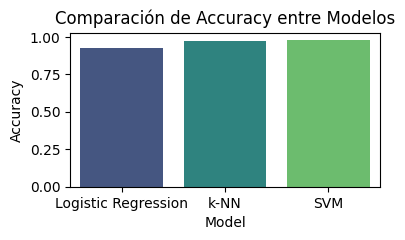

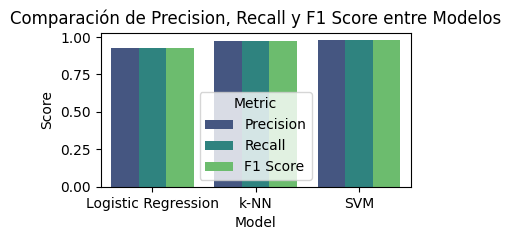

In [17]:
# Guardar métricas en un diccionario
metrics = {
    'Model': ['Logistic Regression', 'k-NN', 'SVM'],
    'Accuracy': [lr_accuracy, knn_accuracy, svm_accuracy],
    'Precision': [lr_precision, knn_precision, svm_precision],
    'Recall': [lr_recall, knn_recall, svm_recall],
    'F1 Score': [lr_f1, knn_f1, svm_f1]
}

# Convertir el diccionario en un DataFrame
metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla
print(metrics_df)

# Crear una gráfica de barras con Seaborn para Accuracy
plt.figure(figsize=(4, 2))  # Reducir tamaño de la gráfica
sns.barplot(x='Model', y='Accuracy', hue='Model', data=metrics_df, palette='viridis', dodge=False)
plt.title('Comparación de Accuracy entre Modelos')
plt.legend([], [], frameon=False)  # Eliminar leyenda redundante
plt.show()

# Crear una gráfica de barras para Precision, Recall y F1 Score
plt.figure(figsize=(4, 2))  # Reducir tamaño de la gráfica
metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Precision', 'Recall', 'F1 Score'], var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='viridis')
plt.title('Comparación de Precision, Recall y F1 Score entre Modelos')
plt.show()


En base a los resultados presentados, el modelo SVM es el mejor a usar en este caso. Esto se debe a que SVM tiene la mayor Accuracy (0.979857), Precision (0.979866), Recall (0.979857) y F1 Score (0.979852) en comparación con Logistic Regression y k-NN. Estas métricas indican que SVM tiene un rendimiento superior en términos de precisión y capacidad para identificar correctamente las clases positivas y negativas.

## Exportar el Modelo

In [28]:
import os
import joblib

# Supongamos que has decidido usar el modelo SVM como modelo definitivo
final_model = best_model_kNN

# Ruta relativa para guardar el modelo directamente en "models"
ruta_modelo = os.path.join( '..', 'models', 'output', 'DigitModel.joblib')


# Guardar el modelo en un archivo
joblib.dump(final_model, ruta_modelo)

print(f"Modelo guardado en {ruta_modelo}")


Modelo guardado en ..\models\output\DigitModel.joblib
